
#import basic libraries



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

#load dataset

In [ ]:
forest=pd.read_csv('Forest.csv')
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


#EDA

In [ ]:
forest.shape

(517, 31)

In [ ]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
forest.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [ ]:
df.columns

Index(['index', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue',
       'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan',
       'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct',
       'monthsep', 'size_category'],
      dtype='object')

In [ ]:
forest.duplicated().value_counts()

False    509
True       8
dtype: int64

In [ ]:
forest[forest.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
df=forest.drop_duplicates()
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,index,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,...,0,0,0,0,1,0,0,0,0,small
1,1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,...,0,0,0,0,0,0,0,1,0,small
2,2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,...,0,0,0,0,0,0,0,1,0,small
3,3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,...,0,0,0,0,1,0,0,0,0,small
4,4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,...,0,0,0,0,0,0,0,0,0,large
505,513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,...,0,0,0,0,0,0,0,0,0,large
506,514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,...,0,0,0,0,0,0,0,0,0,large
507,515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
df.describe()

,index,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,257.011788,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,148.836140,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129.000000,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,257.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,385.000000,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,516.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.drop(['month','day'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df

,index,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,...,0,0,0,0,1,0,0,0,0,small
1,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,...,0,0,0,0,0,0,0,1,0,small
2,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,...,0,0,0,0,0,0,0,1,0,small
3,3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,...,0,0,0,0,1,0,0,0,0,small
4,4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,...,0,0,0,0,0,0,0,0,0,large
505,513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,...,0,0,0,0,0,0,0,0,0,large
506,514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,...,0,0,0,0,0,0,0,0,0,large
507,515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,...,0,0,0,0,0,0,0,0,0,small


#splitting data into x&y features

In [ ]:
x=df.iloc[:,1:29]
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=df.iloc[:,29:]
y

,size_category
0,small
1,small
2,small
3,small
4,small
...,...
504,large
505,large
506,large
507,small


#standardising the x features

In [ ]:
std=StandardScaler()
x=pd.DataFrame(std.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,-0.202791,2.265509,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
1,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,-0.202791,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413
2,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,-0.202791,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413
3,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,-0.202791,2.265509,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
4,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,-0.202791,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,-0.069035,-0.102277,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413
505,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,-0.069035,0.644559,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413
506,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,-0.069035,-0.028608,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413
507,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,-0.069035,-0.202791,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413


#encoding y features

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y=pd.Series(y)
y


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0      1
1      1
2      1
3      1
4      1
      ..
504    0
505    0
506    0
507    1
508    1
Length: 509, dtype: int64

#splitting data into train & test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((356, 28), (153, 28), (356,), (153,))

#grid search

#Linear kernel

In [ ]:
clf_linear= SVC(kernel='linear')
clf_linear.fit(x_train,y_train)
y_pred=clf_linear.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
acc=accuracy_score(y_test,y_pred)*100
acc

88.23529411764706

In [ ]:
confusion=confusion_matrix(y_test,y_pred)
confusion

array([[ 23,  18],
       [  0, 112]])

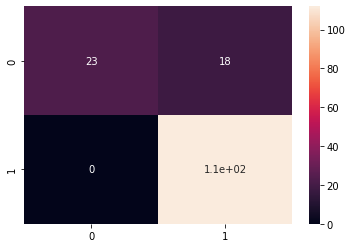

In [ ]:
sns.heatmap(confusion,annot=True)

#ploy kernel

In [ ]:
poly=SVC(kernel='poly')
poly.fit(x_train,y_train)
y_pred=poly.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
acc=accuracy_score(y_test,y_pred)*100
acc

72.54901960784314

In [ ]:
confusion_1=confusion_matrix(y_test,y_pred)
confusion_1

array([[  3,  38],
       [  4, 108]])

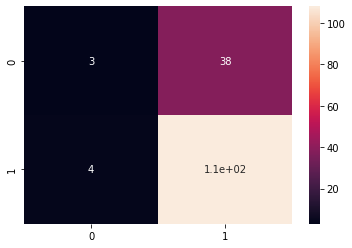

In [ ]:
sns.heatmap(confusion_1,annot=True)

#rbf kernel

In [ ]:
rbf=SVC(kernel='rbf')
rbf.fit(x_train,y_train)
y_pred=rbf.predict(x_test)
y_pred
acc=accuracy_score(y_test,y_pred)*100
print(acc)
confusion_2=confusion_matrix(y_test,y_pred)
confusion_2

75.81699346405229


array([[  4,  37],
       [  0, 112]])

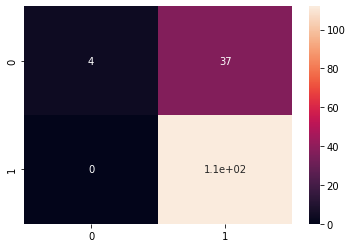

In [ ]:
sns.heatmap(confusion_2,annot=True)

In [ ]:
clf= SVC()
parma_grid = [{'kernel' : ["sigmoid"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]


In [ ]:
#out of above three kernel models linear has better accuracy i.e 88.23529411764706
